# Exercice 3

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
path = '/home/cytech/Desktop/downloads/Examen2425/GOOG.csv'
df= pd.read_csv(path)

### calcul des moyennes mobiles

In [73]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

In [74]:
df['Signal'] = 0
df['Signal'][20:] = np.where(df['MA20'][20:] > df['MA50'][20:], 1, 0)
df['Position'] = df['Signal'].diff()

/tmp/ipykernel_11279/1624726176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][20:] = np.where(df['MA20'][20:] > df['MA50'][20:], 1, 0)


### generation du signaux d'achats et de ventes

In [75]:
df['achat'] = df['vente'] = np.nan

df.loc[df['Position'] == 1, 'achat'] = df['Close']

df.loc[df['Position'] == -1, 'vente'] = df['Close']


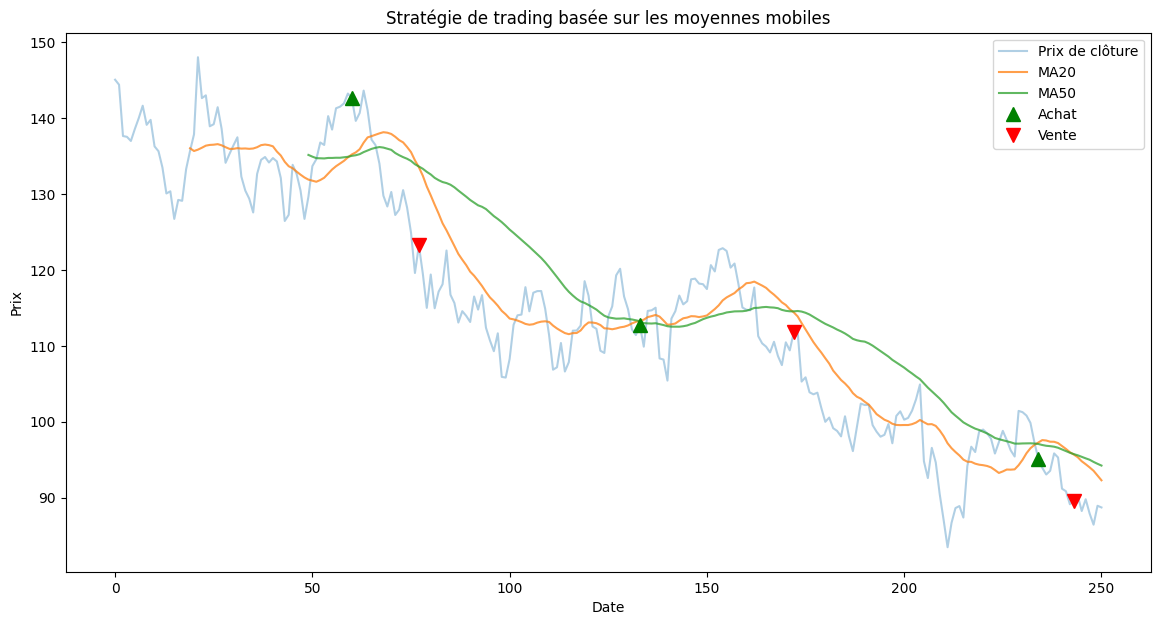

In [76]:

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Prix de clôture', alpha=0.35)
plt.plot(df['MA20'], label='MA20', alpha=0.75)
plt.plot(df['MA50'], label='MA50', alpha=0.75)

plt.plot(df['achat'], '^', markersize=10, color='g', lw=0, label='Achat')

plt.plot(df['vente'], 'v', markersize=10, color='r', lw=0, label='Vente')

plt.title('Stratégie de trading basée sur les moyennes mobiles')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


In [81]:
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']
sigma_p= df["Close"].std(ddof=1)

In [79]:
R_p = df["Strategy_Returns"].mean()

In [82]:
sharp_ratio = (R_p*100-2.5)/sigma_p

In [85]:
print(f"L'investissement a un rendement inférieur au rendement sans risque,car {sharp_ratio} < 0")

L'investissement a un rendement inférieur au rendement sans risque,car -0.15699280324705775 < 0


In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton

# Paramètres de l'option
S = 100  # Prix actuel de l'actif sous-jacent
K = 100  # Prix d'exercice
T = 1    # Temps jusqu'à l'échéance (en années)
r = 0.05 # Taux d'intérêt sans risque
C_market = 10  # Prix de marché de l'option call

# Fonction de prix de l'option call selon Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Fonction pour calculer la différence entre le prix de marché et le prix théorique
def call_price_difference(sigma):
    return black_scholes_call(S, K, T, r, sigma) - C_market

# Estimation initiale de la volatilité
sigma_initial = 0.2

# Calcul de la volatilité implicite
volatilité_implicite = newton(call_price_difference, sigma_initial)
volatilité_implicite


0.18797164945691003

/home/cytech/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


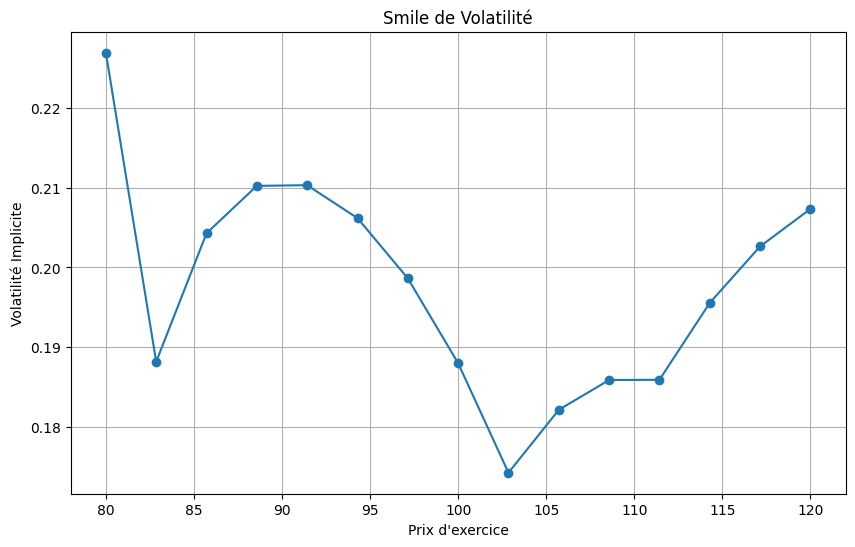

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import newton

# Paramètres de base
S = 100  # Prix actuel de l'actif sous-jacent
T = 1    # Temps jusqu'à l'échéance (en années)
r = 0.05 # Taux d'intérêt sans risque

# Fonction de prix de l'option call selon Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Fonction pour calculer la différence entre le prix de marché et le prix théorique
def call_price_difference(sigma, S, K, T, r, C_market):
    return black_scholes_call(S, K, T, r, sigma) - C_market

# Calcul de la volatilité implicite pour un prix d'exercice donné
def implied_volatility(S, K, T, r, C_market, sigma_initial=0.2):
    return newton(call_price_difference, sigma_initial, args=(S, K, T, r, C_market))

# Prix de marché hypothétiques pour différents prix d'exercice
strike_prices = np.linspace(80, 120, 15)
market_prices = [
    25, 22, 20, 18, 16, 14, 12, 10, 8, 7, 6, 5, 4.5, 4, 3.5
]  # Exemple de prix de marché

# Calcul des volatilités implicites
implied_vols = [implied_volatility(S, K, T, r, C) for K, C in zip(strike_prices, market_prices)]

# Tracer le smile de volatilité
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, implied_vols, marker='o', linestyle='-')
plt.title('Smile de Volatilité')
plt.xlabel('Prix d\'exercice')
plt.ylabel('Volatilité Implicite')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Volatilités implicites des actions individuelles
vol_implicite_A = 0.25  # Volatilité implicite de l'action A
vol_implicite_B = 0.30  # Volatilité implicite de l'action B

# Volatilité implicite de l'indice
vol_implicite_indice = 0.20

# Poids des actions dans l'indice
poids_A = 0.6
poids_B = 0.4

def volatilite_indice_estimee(vol_A, vol_B, poids_A, poids_B, correlation):
    return np.sqrt((poids_A * vol_A)**2 + (poids_B * vol_B)**2 + 2 * poids_A * poids_B * vol_A * vol_B * correlation)

# Estimation de la corrélation implicite
def correlation_implicite(vol_indice, vol_A, vol_B, poids_A, poids_B):
    correlation = ((vol_indice**2 - (poids_A * vol_A)**2 - (poids_B * vol_B)**2) /
                   (2 * poids_A * poids_B * vol_A * vol_B))
    return correlation

# Calcul de la corrélation implicite
correlation_implicite_estimee = correlation_implicite(vol_implicite_indice, vol_implicite_A, vol_implicite_B, poids_A, poids_B)
correlation_implicite_estimee


0.08611111111111137